In [1]:
import torch
import numpy as np

numpy矩阵转换

In [2]:
np_data =np.arange(6).reshape([2,3])
torch_data = torch.from_numpy(np_data)
tensor2array=torch_data.numpy()
print(
    np_data,'\n',
    torch_data,'\n',
    tensor2array,'\n',
)

[[0 1 2]
 [3 4 5]] 
 tensor([[0, 1, 2],
        [3, 4, 5]], dtype=torch.int32) 
 [[0 1 2]
 [3 4 5]] 



变量Variable

In [21]:
from torch.autograd import Variable

In [22]:
tensor = torch.FloatTensor([[1,2],[3,4]])
variable = Variable(tensor,requires_grad=True)
print(tensor)
print(type(tensor))
print(type(variable))

tensor([[1., 2.],
        [3., 4.]])
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [23]:
t_out = torch.mean(tensor*tensor)
v_out = torch.mean(variable*variable)
print(t_out,'\n',v_out)

tensor(7.5000) 
 tensor(7.5000, grad_fn=<MeanBackward1>)


In [24]:
v_out.backward()
print(variable.grad)
# print(type(tensor))

tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])


In [7]:
print(variable)
print(variable.data)
print(variable.data.numpy())

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)
tensor([[1., 2.],
        [3., 4.]])
[[1. 2.]
 [3. 4.]]


激励函数 Activation

In [11]:
import torch.nn.functional as F

In [8]:
x = torch.linspace(-5,5,200)
x = Variable(x)

In [37]:
x_np = x.data.numpy()
y_relu = torch.relu(x).data.numpy()
y_sigmoid = torch.sigmoid(x).data.numpy()
y_tanh = torch.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()
y_softmax = F.softmax(x,dim=1).data.numpy()

In [27]:
import matplotlib.pyplot as plt

(200,)


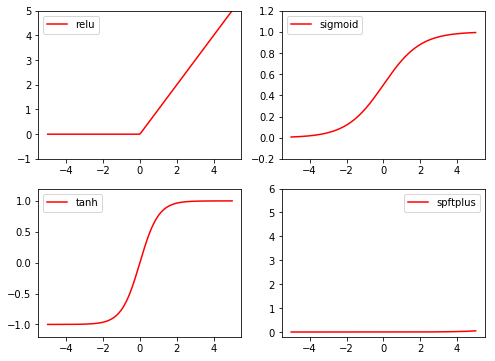

In [33]:
plt.figure(1,figsize=(8,6))
plt.subplot(221)
plt.plot(x_np,y_relu,c='r',label='relu')
plt.ylim((-1,5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np,y_sigmoid,c='r',label='sigmoid')
plt.ylim((-0.2,1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np,y_tanh,c='r',label='tanh')
plt.ylim((-1.2,1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np,y_softmax,c='r',label='spftplus')
plt.ylim((-0.2,6))
plt.legend(loc='best')
print(y_softmax.shape)

关系拟合 线性回归

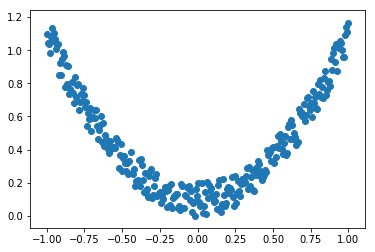

In [17]:
x = torch.unsqueeze(torch.linspace(-1,1,300),dim=1)
y = x.pow(2) + 0.2*torch.rand(x.size())
plt.scatter(x.data.numpy(),y.data.numpy())

搭建神经网络

In [18]:

class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden = torch.nn.Linear(n_feature,n_hidden)
        self.predict = torch.nn.Linear(n_hidden,n_output)
    
    def forward(self,x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [19]:
net = Net(n_feature=1,n_hidden=10,n_output=1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


训练网络 可视化

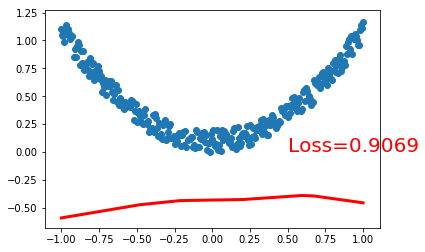

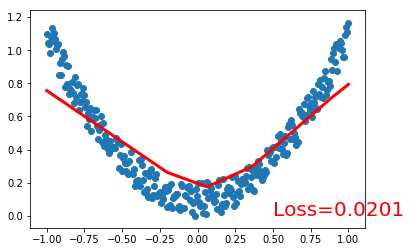

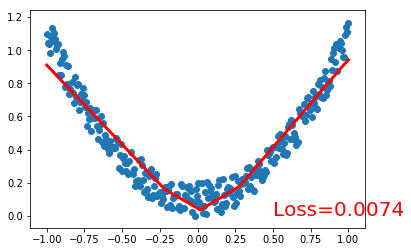

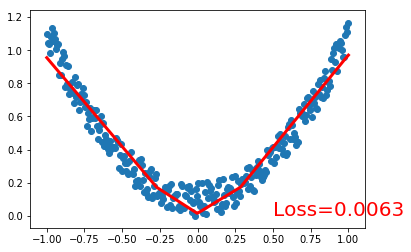

In [20]:
opt = torch.optim.SGD(net.parameters(),lr=0.2)
loss_func = torch.nn.MSELoss()
plt.ion()
plt.show()
for i in range(200):
    prediction = net(x)
    loss = loss_func(prediction,y)
    opt.zero_grad()
    loss.backward()
    opt.step()
    if i%50 ==0:
        plt.cla()
        plt.scatter(x.data.numpy(),y.data.numpy())
        plt.plot(x.data.numpy(),prediction.data.numpy(),'r-',lw=3)
        plt.text(0.5,0,'Loss=%.4f'%loss.data.numpy(),fontdict={'size':20,'color':'red'})
        plt.pause(0.5)

分类 建立数据集

In [34]:
n_data = torch.ones(100,2)
x0 = torch.normal(n_data*2,1)
y0 = torch.zeros(100)
x1 = torch.normal(-2*n_data,1)
y1 = torch.ones(100)
x = torch.cat((x0,x1),0).type(torch.FloatTensor)
y = torch.cat((y0,y1),0).type(torch.LongTensor)
# plt.scatter(x.data.numpy(), y.data.numpy())
# plt.show()



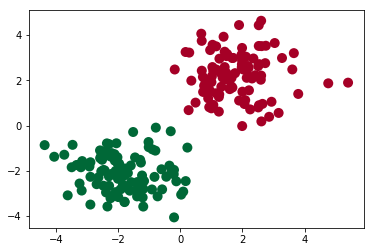

In [35]:
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)      # class0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # class0 y data (tensor), shape=(100, 1)
x1 = torch.normal(-2*n_data, 1)     # class1 x data (tensor), shape=(100, 2)
y1 = torch.ones(100)                # class1 y data (tensor), shape=(100, 1)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # shape (200, 2) FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # shape (200,) LongTensor = 64-bit integer

# The code below is deprecated in Pytorch 0.4. Now, autograd directly supports tensors
x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [66]:
class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden = torch.nn.Linear(n_feature,n_hidden)
        self.out = torch.nn.Linear(n_hidden,n_output)
    def forward(self,x):
        x = F.relu(self.hidden(x))
        x = self.out(x)
        return x
net = Net(n_feature=2,n_hidden=10,n_output=2)
print(net)
print(net.parameters())

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)
<generator object Module.parameters at 0x0000024D5118F468>


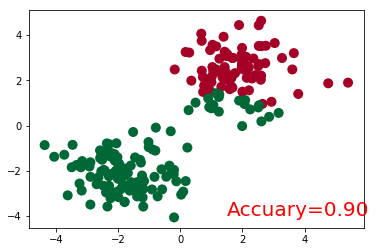

In [43]:
opt = torch.optim.SGD(net.parameters(),lr=0.0002)
loss_func = torch.nn.CrossEntropyLoss()
for i in range(100):
    out = net(x)
    loss = loss_func(out,y)
    opt.zero_grad()
    loss.backward()
    opt.step()
    if i%20==0:
        plt.cla()
        prediction = torch.max(F.softmax(out,dim=1),1)[1]
        pred_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1],c=pred_y,s=100,lw=0,cmap='RdYlGn')
        accuary = sum(pred_y==target_y)/200
        plt.text(1.5,-4,'Accuary=%.2f'%accuary,fontdict={'size':20,'color':'red'})

快速搭建方法

In [54]:
net2 = torch.nn.Sequential(
    torch.nn.Linear(2,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,2),
)
print(net)
print(net2)

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)
Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=2, bias=True)
)


保存 提取

In [57]:
def save():
    net2 = torch.nn.Sequential(
    torch.nn.Linear(2,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,2),
    )
    opt = torch.optim.SGD(net.parameters(),lr=0.0002)
    loss_func = torch.nn.CrossEntropyLoss()
    for i in range(100):
        out = net2(x)
        loss = loss_func(out,y)
        opt.zero_grad()
        loss.backward()
        opt.step()
    torch.save(net2,'net2.pkl')#entire net
    torch.save(net2.state_dict(),'net2_params.pkl') #parameters

def restore_net():
    net2 = torch.load('net2.pkl')

def restore_params():
    net3 = torch.nn.Sequential(
    torch.nn.Linear(2,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,2),
    )
    net3.load_state_dict(torch.load('net2_params.pkl'))
save()
restore_net()
restore_params()

批训练

In [57]:
import torch.utils.data as Data
import time

In [64]:
start=time.time()
BATCH_SIZE = 3
x = torch.linspace(1,10,10)
y = torch.linspace(10,1,10)
torch_dataset = Data.TensorDataset(x,y)
loader = Data.DataLoader(
    dataset = torch_dataset,
    batch_size =BATCH_SIZE,
    shuffle = True,
    #num_workers=16
)

for epoch in range(3):
    for step,(batch_x,batch_y) in enumerate(loader):
        #training
        print('Epoch',epoch+1,'|step:',step,'|batch x:',batch_x.numpy(),'|batch y:',batch_y.numpy())
end = time.time()
speed=end-start
print(speed,'s')

Epoch 1 |step: 0 |batch x: [10.  4.  1.] |batch y: [ 1.  7. 10.]
Epoch 1 |step: 1 |batch x: [6. 2. 3.] |batch y: [5. 9. 8.]
Epoch 1 |step: 2 |batch x: [5. 9. 8.] |batch y: [6. 2. 3.]
Epoch 1 |step: 3 |batch x: [7.] |batch y: [4.]
Epoch 2 |step: 0 |batch x: [3. 4. 9.] |batch y: [8. 7. 2.]
Epoch 2 |step: 1 |batch x: [ 7. 10.  1.] |batch y: [ 4.  1. 10.]
Epoch 2 |step: 2 |batch x: [5. 6. 8.] |batch y: [6. 5. 3.]
Epoch 2 |step: 3 |batch x: [2.] |batch y: [9.]
Epoch 3 |step: 0 |batch x: [ 3. 10.  4.] |batch y: [8. 1. 7.]
Epoch 3 |step: 1 |batch x: [9. 2. 7.] |batch y: [2. 9. 4.]
Epoch 3 |step: 2 |batch x: [6. 1. 5.] |batch y: [ 5. 10.  6.]
Epoch 3 |step: 3 |batch x: [8.] |batch y: [3.]
5.181358098983765 s


加速神经网络训练